<a href="https://colab.research.google.com/github/VarunGor/ML/blob/master/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bike Sharing Demand Dataset**

We have hourly rental data spanning two years. The training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. 

We must predict ***the total count of bikes rented during each hour*** covered by the test set, using only information available prior to the rental period.

**Data Fields** 


1.   datetime - hourly date + timestamp
2.   season - 1 = spring, 2 = summer, 3 = fall, 4 = winter 
3.   holiday - whether the day is considered a holiday
4.   workingday - whether the day is neither a weekend nor holiday
5.   weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
6.  temp - temperature in Celsius
7. atemp - "feels like" temperature in Celsius
8. humidity - relative humidity
9. windspeed - wind speed
10. casual - number of non-registered user rentals initiated
11. registered - number of registered user rentals initiated
12. count - number of total rentals

In [0]:
import pandas as pd
import numpy as np

**Loading the Data**

In [0]:
url = 'https://raw.githubusercontent.com/VarunGor/Dataset/master/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [0]:
print('Data Rows : ', len(bikes))
bikes.head(5)

Data Rows :  10886


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [0]:
# "count" is a method, so it's best to name that column something else
bikes.rename(columns={'count':'total'}, inplace = True)



In [0]:
bikes.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Exploratory Data Analysis (EDA)**

In [0]:
import seaborn as sb
import matplotlib.pyplot as plt

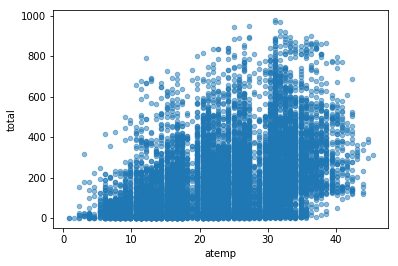

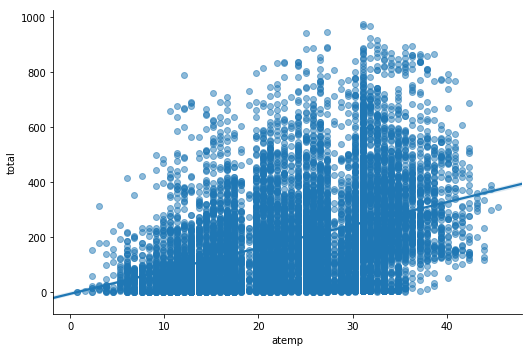

In [0]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='atemp', y='total', alpha=0.5)

sb.lmplot(x='atemp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.5})

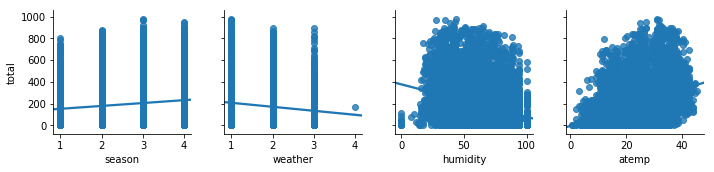

In [0]:
# explore more features
features = ['season', 'weather', 'humidity', 'atemp']
sb.pairplot(bikes, x_vars=features, y_vars='total', kind='reg')

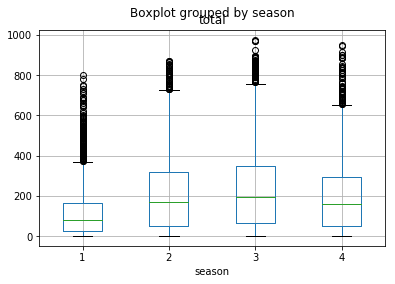

In [0]:
# box plot of rentals, grouped by season
bikes.boxplot(column='total', by='season')

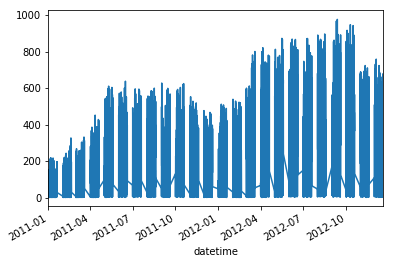

In [0]:
# line plot of rentals
bikes.total.plot()

There are more rentals in the winter than the spring, but only because the system is experiencing overall growth and the winter months happen to come after the spring months.


**Building a simple linear regression model**

In [0]:
# create input X(Independent Variable(s)) and output y(Dependent Variable)

feature_cols = ['atemp']

X = bikes[feature_cols]
y = bikes.total


In [0]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# print the coefficients
print (linReg.intercept_)
print (linReg.coef_)

-5.5114213685680795
[8.33163614]
